In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

from MASC_core import MASC_core

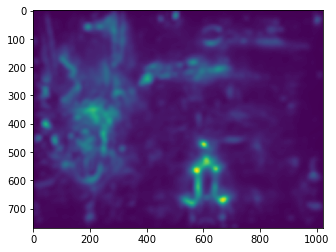

(768, 1024)


In [2]:
priority_map = np.double(np.array(Image.open('PriorityMap.png')))
priority_map = priority_map/np.max(priority_map)
plt.imshow(priority_map)
plt.show()

im_size = priority_map.shape
print(im_size)
im_h = im_size[0]
im_w = im_size[1]

if(len(im_size) > 2):
    priority_map = np.mean(priority_map,axis=2);
    
# set the initial fixtion at center
row_im_f = math.floor(im_h/2) ;
col_im_f = math.floor(im_w/2) ;
RETINA_PIXDEG = 30 ; 

In [3]:
def gauss2D(shape,sigma):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


apply_IOR = 1
IOR_size = 200  # pixels
IOR_offset = math.floor(IOR_size/2)
IOR_sigma = IOR_size/2 ;
filt_IOR = gauss2D([IOR_size,IOR_size], IOR_sigma)  

In [4]:
num_fix = 15
fixations_row = np.zeros((num_fix))
fixations_col = np.zeros((num_fix))
priority_map_fixs = priority_map
fixation_map = np.zeros((im_h+IOR_size,im_w+IOR_size));

# set the initial fixation at center
row_im_f = math.floor(im_h/2) ;
col_im_f = math.floor(im_w/2) ;
RETINA_PIXDEG = 30 ; 

for fix in range(num_fix):
    fixations_row[fix] = row_im_f
    fixations_col[fix] = col_im_f
    
    col_im_m, row_im_m, moto_Coll_framed, col_m_coll, row_m_coll = MASC_core(priority_map_fixs, RETINA_PIXDEG,col_im_f,row_im_f)
    

    #print(fixations_row)
    if (apply_IOR): 
        #fixation_map[row_im_f+IOR_offset,col_im_f+IOR_offset] = 1 
        fixation_map[row_im_f:row_im_f+2*IOR_offset,col_im_f:col_im_f+2*IOR_offset] = \
            fixation_map[row_im_f:row_im_f+2*IOR_offset,col_im_f:col_im_f+2*IOR_offset] + filt_IOR
        IOR_map = fixation_map[IOR_offset:IOR_offset+im_h,IOR_offset:IOR_offset+im_w] 
        IOR_map = IOR_map / np.max(IOR_map)
        priority_map_fixs = priority_map_fixs - IOR_map 
    
    row_im_f = row_im_m ;
    col_im_f = col_im_m ;



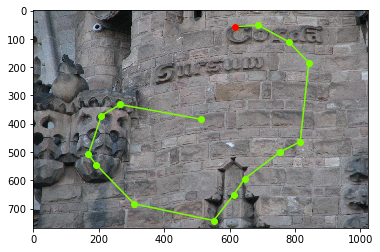

In [5]:
scene_image = np.array(Image.open('1.jpg'))
plt.imshow(scene_image, aspect='auto')

plt.plot(fixations_col, fixations_row, '-o', color='lawngreen')
plt.plot(fixations_col[-1], fixations_row[-1], 'o',color='red')
plt.savefig('saccade_15_scene.jpg')

plt.show()